<a href="https://colab.research.google.com/github/Vipul251/MLProject/blob/main/Fraud_Transaction_Prediction_Model_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Scaling
from sklearn.preprocessing import StandardScaler


In [ ]:
# Loading the fraud dataset
df_fraud = pd.read_csv('Fraud.csv')

In [ ]:
# Display the first few rows of the dataset
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
with open('Data Dictionary.txt', 'r') as file:
    data_dictionary = file.read()

# Print the contents of the data dictionary
print(data_dictionary)


In [ ]:
# Get basic info about the dataset
df_fraud.info()

In [ ]:
# Check for missing values
df_fraud.isnull().sum()

In [ ]:
# Display statistics of numerical columns
df_fraud.describe()

In [ ]:
# Check for missing values
missing_values = df_fraud.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
# Fill missing values (example for numerical columns)
df_fraud.fillna(df_fraud.mean(), inplace=True)  # For numerical columns
# For categorical columns, you might want to do:
# df_fraud['category_column'].fillna(df_fraud['category_column'].mode()[0], inplace=True)


In [ ]:
from scipy import stats

# Remove outliers using Z-score
z_scores = stats.zscore(df_fraud.select_dtypes(include=['float64', 'int64']))
df_fraud = df_fraud[(z_scores < 3).all(axis=1)]  # Retain rows within 3 standard deviations


In [ ]:
# Fill missing values or drop rows if needed
df_fraud = df_fraud.dropna()


In [ ]:
print(df_fraud.shape)


(6020098, 11)


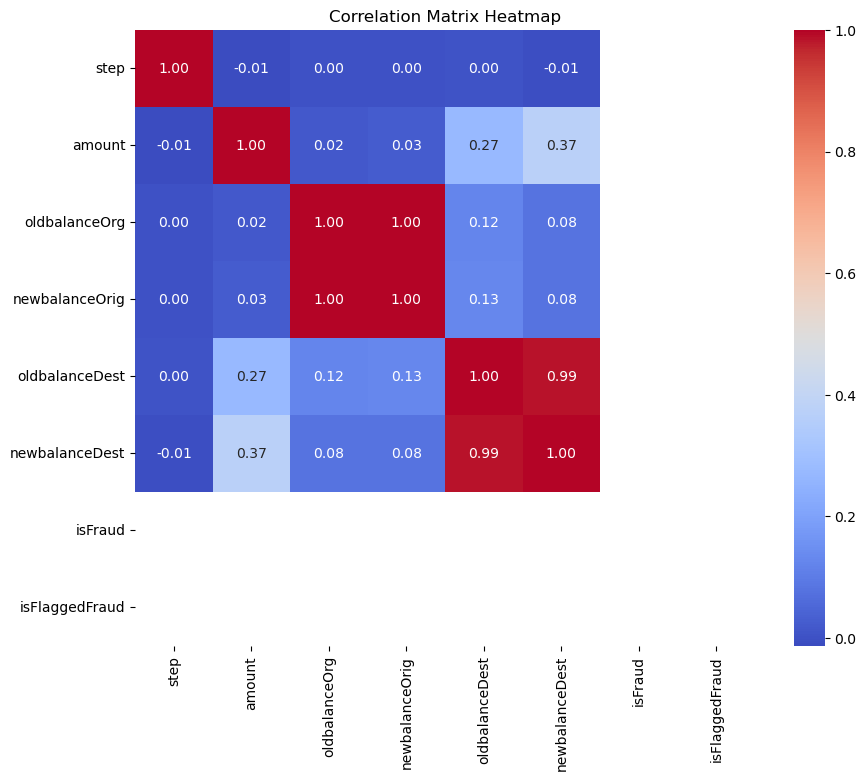

In [ ]:
# Step 1: Identify and select only numeric columns
numeric_data = df_fraud.select_dtypes(include=[np.number])

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Step 3: Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Step 1: Check the existing columns
print(df_fraud.columns)



Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
# Step 1: Check the existing columns
print(df_fraud.columns.tolist())

# Step 2: Identify which columns you want to drop based on the printed output
# For example, you decide to drop 'isFlaggedFraud'

# Step 3: Drop the identified columns (make sure to use the correct names)
df_fraud.drop(['isFlaggedFraud'], axis=1, inplace=True)



['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [ ]:
# Check for missing values
print(df_fraud.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [ ]:
# Example: Drop rows with missing values
df_fraud.dropna(inplace=True)


In [ ]:
# Example: Calculate balance change
df_fraud['balanceChangeOrig'] = df_fraud['newbalanceOrig'] - df_fraud['oldbalanceOrg']
df_fraud['balanceChangeDest'] = df_fraud['newbalanceDest'] - df_fraud['oldbalanceDest']


In [ ]:
# Example: One-hot encoding for the 'type' column
df_fraud = pd.get_dummies(df_fraud, columns=['type'], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df_fraud.drop('isFraud', axis=1)  # Features
y = df_fraud['isFraud']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.dtypes)


step                   int64
amount               float64
nameOrig              object
oldbalanceOrg        float64
newbalanceOrig       float64
nameDest              object
oldbalanceDest       float64
newbalanceDest       float64
balanceChangeOrig    float64
balanceChangeDest    float64
type_CASH_OUT           bool
type_DEBIT              bool
type_PAYMENT            bool
type_TRANSFER           bool
dtype: object


In [ ]:
print(X_train.head())  # Check the first few rows
print(X_train.columns)  # Check the column names


         step     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
5720105   398   22840.80  C1116924789        1527.00            0.00   
3742136   279    1496.74  C1518078604       78140.00        76643.26   
1169716   132  208068.37   C857036480         128.00            0.00   
5087213   355    3340.78  C1975686471      150294.00       146953.22   
1769564   162  510841.84   C474570228        4302.78            0.00   

            nameDest  oldbalanceDest  newbalanceDest  balanceChangeOrig  \
5720105  C1942768375       250269.89       273110.68           -1527.00   
3742136  M1213618213            0.00            0.00           -1496.74   
1169716  C2052764632       259354.97       467423.34            -128.00   
5087213  M1717756899            0.00            0.00           -3340.78   
1769564  C1270412164      3221108.20      3731950.04           -4302.78   

         balanceChangeDest  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
5720105           22840.79           True    

In [ ]:
# Drop columns that you don't want in your model
# Replace 'id' with actual column names if they differ
columns_to_drop = ['id']  # Modify this list based on actual columns present
X_train = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns], axis=1)
X_test = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns], axis=1)


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)  # Convert categorical variables to dummy variables
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
print(y_train.unique())


[0]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Make sure to use transform, not fit_transform on test data


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)


In [ ]:
print(set(y_train_encoded))


{0}


In [ ]:
pip install category_encoders


                                              0.0/82.0 kB ? eta -:--:--
     ----                                     10.2/82.0 kB ? eta -:--:--
     --------------                         30.7/82.0 kB 330.3 kB/s eta 0:00:01
     ------------------                     41.0/82.0 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 82.0/82.0 kB 460.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import category_encoders as ce  # Ensure category encoders are imported
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE



# Define features and target
target_column_name = 'isFraud'  # Your target column name
X = df_fraud.drop(target_column_name, axis=1)
y = df_fraud[target_column_name]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a threshold for combining rare categories
threshold = 1000  # Adjust based on your needs
for col in ['type', 'nameDest']:  # Use the correct categorical columns here
    counts = X_train[col].value_counts()
    X_train[col] = X_train[col].where(X_train[col].isin(counts[counts > threshold].index), 'Other')

# Encode categorical features with Target Encoding
target_encoder = ce.TargetEncoder(cols=['type', 'nameDest'])  # Update with your categorical columns
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Check the data types of the encoded features
print("Data types of features:")
print(X_train_encoded.dtypes)

# Ensure all features are numeric before applying SMOTE
X_train_encoded = X_train_encoded.apply(pd.to_numeric, errors='coerce')
X_test_encoded = X_test_encoded.apply(pd.to_numeric, errors='coerce')

# Handle NaN values created during conversion (if any)
X_train_encoded.fillna(0, inplace=True)
X_test_encoded.fillna(0, inplace=True)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# Fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [ ]:
#hyperparmaeter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_encoded, y_train_encoded)
print("Best parameters:", grid_search.best_params_)


In [ ]:
pip install imbalanced-learn


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_encoded.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_encoded.shape[1]), X_train_encoded.columns[indices], rotation=90)
plt.xlim([-1, X_train_encoded.shape[1]])
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_encoded, y_train_encoded, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))


In [ ]:
y_prob = model.predict_proba(X_test_encoded)[:, 1]
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train_encoded)


In [ ]:
#dataset is too large previewing the first 1,000 rows to ensure everything works/
df_fraud_sample = df_fraud.head(1000)
categorical_cols = df_fraud_sample.select_dtypes(include=['object', 'category']).columns.tolist()


In [ ]:
chunks = pd.read_csv('Fraud.csv', chunksize=100000)  # Smaller chunks


In [ ]:
df_fraud.head()

In [ ]:
for chunk in chunks:
    # Process each chunk separately
    categorical_cols = chunk.select_dtypes(include=['object', 'category']).columns.tolist()
    # Further operations on each chunk


In [ ]:
# Load the first chunk and detect categorical columns
first_chunk = next(chunks)


In [ ]:
df_fraud_sparse = pd.get_dummies(df_fraud[categorical_cols], drop_first=True, sparse=True)


In [ ]:
filtered_categorical_cols = [col for col in categorical_cols if df_fraud[col].nunique() < 50]
df_fraud_encoded = pd.get_dummies(df_fraud[filtered_categorical_cols], drop_first=True)


In [ ]:
# Limit the number of columns processed
categorical_cols = df_fraud.select_dtypes(include=['object']).columns.tolist()

# If too many categories exist in some columns, consider filtering
df_fraud = pd.get_dummies(df_fraud[categorical_cols], drop_first=True)

# If necessary, sample the DataFrame for testing
# df_fraud_sample = df_fraud.sample(n=1000)  # If df_fraud is too large

# Proceed with your analysis or model training


In [ ]:
# Convert categorical features to numerical
df_fraud = pd.get_dummies(df_fraud, drop_first=True)


In [ ]:
# Define the feature matrix X and the target variable y
scaler = StandardScaler()

# Assuming 'isFraud' is the target column
X = df_fraud.drop(['isFraud'], axis=1)
y = df_fraud['isFraud']

# Apply scaling
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)


In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Re-evaluate model with best parameters
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_tuned))


In [ ]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.show()
